# Usefull imports

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

# Import main dataset

In [74]:
# First let's create a copy of our data
data=pd.read_csv('regularite-mensuelle-tgv-aqst.csv',delimiter=';')
df = data.copy()
df = df[(df['duree_moyenne'] > 0)]
df[['année', 'mois']] = df['date'].str.split('-', expand=True).astype(int)
remove_columns_0 = ['prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic',
'prct_cause_materiel_roulant', 'prct_cause_gestion_gare', 'prct_cause_prise_en_charge_voyageurs', 'commentaire_annulation', 'commentaire_retards_depart', 'commentaires_retard_arrivee']
remove_columns_1 = remove_columns_0 + ['retard_moyen_tous_trains_arrivee']
remove_columns_2 = remove_columns_1 + ['nb_train_retard_sup_15' , 'retard_moyen_trains_retard_sup15' , 'nb_train_retard_sup_30' , 'nb_train_retard_sup_60']
remove_columns_3 = remove_columns_2 + ['nb_train_retard_arrivee']
remove_columns_4 = remove_columns_3 + ['nb_train_depart_retard' , 'retard_moyen_depart' , 'retard_moyen_tous_trains_depart']
remove_columns_5 = remove_columns_4 + ['nb_annulation']
# Cleaning the data
df = clean_data(df,remove_columns_3)
df.head()

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,retard_moyen_arrivee,année,mois
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,289,11.247809,3.693179,28.436735,2018,1
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,8,2.875000,0.095796,21.524020,2018,1
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,37,9.501351,1.003981,55.692308,2018,1
3,2018-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,12,19.912500,1.966667,48.623077,2018,1
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,61,7.796995,0.886889,12.405164,2018,1


# Import External dataset

In [75]:
extern_data = pd.read_csv('objets-trouves-restitution.csv',delimiter=";")
df_objects = extern_data.copy()
df_objects = df_objects.drop(['Date et heure de restitution',\
                        'Code UIC',\
              "Nature d'objets",\
              "Type d'enregistrement"], axis = 1)
df_objects['Date'] = pd.to_datetime(df_objects['Date'])
df_objects['Date'] = pd.to_datetime(df_objects['Date'], format='%Y-%m-%d %H:%M:%S', utc=True).dt.strftime('%Y-%m')
df_objects[['annee', 'mois']] = df_objects['Date'].str.split('-', expand=True)
df_objects = df_objects.drop(['Date'], axis = 1)
df_objects = df_objects.groupby(['Gare', 'annee', 'mois', "Type d'objets"]).size().reset_index(name='nombre_objs')
df_objects = df_objects.rename(columns={'Gare':'gare_depart', 'annee': 'année'})
#Pivoter la dataset
df_objects = df_objects.pivot(index=['gare_depart', 'année', 'mois'], columns="Type d'objets", values='nombre_objs').reset_index()
df_objects = df_objects.fillna(0)
#Modifier les types pour pouvoir merger
df_objects['année'] = pd.to_numeric(df_objects['année'])
df_objects['mois'] = pd.to_numeric(df_objects['mois'])

df_objects.head()

Type d'objets,gare_depart,année,mois,"Appareils électroniques, informatiques, appareils photo","Articles d'enfants, de puériculture","Articles de sport, loisirs, camping",Articles médicaux,"Bagagerie: sacs, valises, cartables","Bijoux, montres","Clés, porte-clés, badge magnétique",Divers,Instruments de musique,"Livres, articles de papéterie",Optique,Parapluies,Pièces d'identités et papiers personnels,"Porte-monnaie / portefeuille, argent, titres","Vélos, trottinettes, accessoires 2 roues","Vêtements, chaussures"
0,AIX EN PROVENCE TGV,2014,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,2.0,0.0,0.0,0.0,2.0
1,AIX EN PROVENCE TGV,2014,2,5.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,3.0,1.0,0.0,1.0
2,AIX EN PROVENCE TGV,2014,3,3.0,1.0,0.0,0.0,5.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0
3,AIX EN PROVENCE TGV,2014,4,6.0,1.0,0.0,0.0,5.0,1.0,2.0,3.0,0.0,0.0,5.0,0.0,3.0,4.0,0.0,3.0
4,AIX EN PROVENCE TGV,2014,5,3.0,2.0,0.0,0.0,9.0,1.0,3.0,0.0,0.0,0.0,4.0,0.0,9.0,2.0,0.0,5.0


In [76]:
df_objects.drop_duplicates(subset=['gare_depart'])

Type d'objets,gare_depart,année,mois,"Appareils électroniques, informatiques, appareils photo","Articles d'enfants, de puériculture","Articles de sport, loisirs, camping",Articles médicaux,"Bagagerie: sacs, valises, cartables","Bijoux, montres","Clés, porte-clés, badge magnétique",Divers,Instruments de musique,"Livres, articles de papéterie",Optique,Parapluies,Pièces d'identités et papiers personnels,"Porte-monnaie / portefeuille, argent, titres","Vélos, trottinettes, accessoires 2 roues","Vêtements, chaussures"
0,AIX EN PROVENCE TGV,2014,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,2.0,0.0,0.0,0.0,2.0
115,ANGERS SAINT LAUD,2013,11,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,11.0,7.0,1.0,1.0
234,ANGOULEME,2013,11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
352,ANNECY,2014,4,6.0,2.0,0.0,0.0,13.0,1.0,3.0,2.0,1.0,0.0,6.0,3.0,9.0,12.0,0.0,10.0
466,ARRAS,2014,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15666,Yvetot,2014,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
15708,Épinal,2014,2,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,4.0
15814,Étaples - Le Touquet,2014,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15855,Évian-les-Bains,2014,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
extern_data2 = pd.read_csv('mouvements-sociaux-depuis-2002.csv',delimiter=";")
df_demo = extern_data2.copy()
df_demo = df_demo.drop(['Motif exprimé',\
              'Métiers ciblés par le préavis',\
              'Population devant travailler ciblee par le préavis'], axis = 1)
#Calcul de la durée de greve
df_demo['date_de_fin'].fillna(df_demo['Date'], inplace=True) #Si date de fin est NaN on suppose que c'est un grève de une journée
df_demo['DateDebut'] = pd.to_datetime(df_demo['Date'], format="%d/%m/%Y")
df_demo['DateFin'] = pd.to_datetime(df_demo['date_de_fin'], format="%d/%m/%Y")
df_demo['Duree'] = df_demo['DateFin'] - df_demo['DateDebut']
#Garder le mois et l'année
df_demo[['jour', 'mois', 'année']] = df_demo['Date'].str.split('/', expand=True)
df_demo['année'] = pd.to_numeric(df_demo['année'])
df_demo['mois'] = pd.to_numeric(df_demo['mois'])
df_demo = df_demo[(df_demo.année >= 2018) & (df_demo.année <= 2023)]
df_demo = df_demo.drop(['DateDebut',\
              'DateFin',\
              'Date',\
              'date_de_fin',\
              'jour'], axis = 1)
df_demo['Duree'] = df_demo['Duree'] + pd.to_timedelta(1, unit='D')
df_demo = df_demo.drop(['Nombre de grévistes du préavis'], axis = 1)
df_demo  = df_demo.groupby(['mois', 'année']).agg({'Taux de grévistes au sein de la population concernée par le préavis': 'mean', 'Duree': 'sum'}).reset_index()
df_demo['Duree'] = df_demo['Duree'].dt.days
df_demo = df_demo.rename(columns={'Taux de grévistes au sein de la population concernée par le préavis':'Taux_de_grévistes', 'Duree': 'durée_gréve'})
df_demo

,mois,année,Taux_de_grévistes,durée_gréve
0,1,2020,8.936000,25
1,1,2022,9.400000,1
2,1,2023,42.150000,2
3,2,2018,6.800000,1
4,2,2019,8.700000,1
5,2,2020,3.300000,4
6,2,2021,3.200000,1
7,2,2023,16.700000,3
8,3,2018,17.800000,2
9,3,2019,4.050000,2


# Merge external datasets with the main dataset

In [78]:
external_df = df_demo.merge(df_objects, how='inner')
df = df.merge(external_df, how='inner')
df.head()

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,...,"Clés, porte-clés, badge magnétique",Divers,Instruments de musique,"Livres, articles de papéterie",Optique,Parapluies,Pièces d'identités et papiers personnels,"Porte-monnaie / portefeuille, argent, titres","Vélos, trottinettes, accessoires 2 roues","Vêtements, chaussures"
0,2018-02,National,LAVAL,PARIS MONTPARNASSE,86,187,7,72,7.006713,2.852685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2018-02,National,PARIS MONTPARNASSE,ANGERS SAINT LAUD,90,351,13,57,20.361111,3.147682,...,26.0,3.0,1.0,20.0,21.0,5.0,54.0,68.0,4.0,46.0
2,2018-02,National,PARIS MONTPARNASSE,LE MANS,55,401,14,75,17.596222,3.190999,...,26.0,3.0,1.0,20.0,21.0,5.0,54.0,68.0,4.0,46.0
3,2018-02,National,PARIS MONTPARNASSE,POITIERS,93,459,16,91,19.377473,3.708164,...,26.0,3.0,1.0,20.0,21.0,5.0,54.0,68.0,4.0,46.0
4,2018-02,National,PARIS MONTPARNASSE,ST MALO,154,92,3,15,23.794444,3.769476,...,26.0,3.0,1.0,20.0,21.0,5.0,54.0,68.0,4.0,46.0


# Data Preprocessing 

In [79]:
#One-hot encoding
#categorical_columns=['service','gare_depart','gare_arrivee']
categorical_columns=['service']
df = pd.get_dummies(df,columns=categorical_columns)

df = df.drop(["Articles d'enfants, de puériculture",\
              'Articles de sport, loisirs, camping',\
              'Articles médicaux',\
             'Divers',\
             'Instruments de musique',\
             'Livres, articles de papéterie',\
             'Optique',\
             'Parapluies',\
             'Vélos, trottinettes, accessoires 2 roues',\
             'Vêtements, chaussures'], axis = 1)

<Axes: >

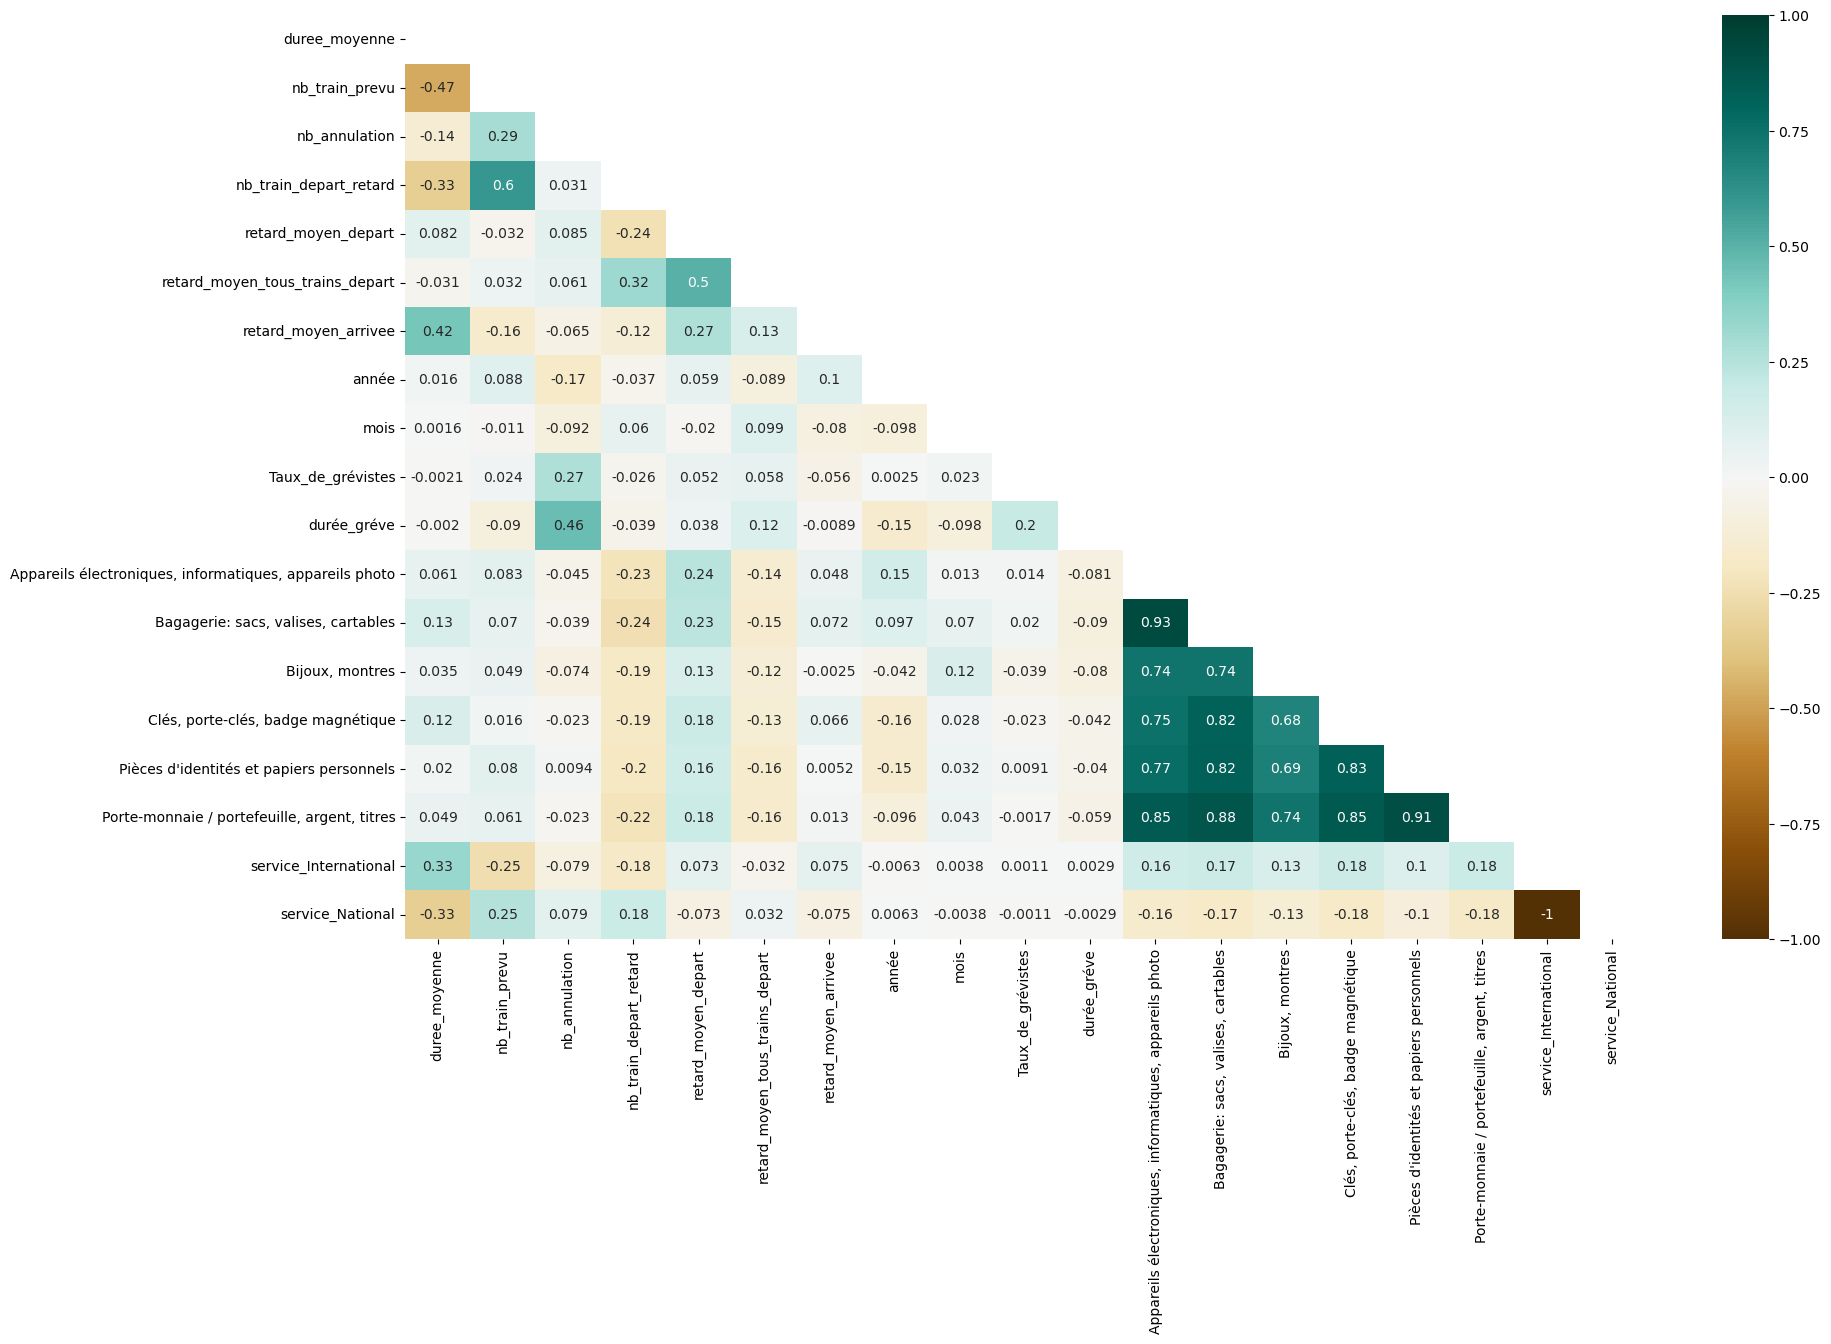

In [80]:
plt.figure(figsize=(20, 12))
df = df.rename(columns={'prct_cause_prise_en_charge_voyageurs':'prct_cause_voyageurs'})
correlation_matrix = df.drop(['date', 'gare_depart', 'gare_arrivee'], axis=1).corr()
#sns.heatmap(df.drop(['service', 'gare_depart', 'gare_arrivee'], axis = 1).corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Train all models with LinearRegressor

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

gares = df[['gare_depart', 'gare_arrivee']].drop_duplicates()
gares = list(zip(gares['gare_depart'], gares['gare_arrivee']))

mean_squared_error_list = {}
r2_list = {}
mean_abs_error_list = {}

numeric_features = ['duree_moyenne', 'nb_train_prevu', 'nb_annulation', 'nb_train_depart_retard', 'retard_moyen_depart',
           'retard_moyen_tous_trains_depart', 'mois', 'année', 'Taux de grévistes au sein de la population concernée par le préavis',\
                   'Duree', 'Appareils électroniques, informatiques, appareils photo', 'Bagagerie: sacs, valises, cartables',\
                   'Bijoux, montres', 'Clés, porte-clés, badge magnétique', "Pièces d'identités et papiers personnels",\
                   'Porte-monnaie / portefeuille, argent, titres']
# Définissez la grille d'hyperparamètres à explorer
param_grid = {'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]}


for gare_depart, gare_arrivee in gares :
    print(gare_depart, ' -------> ', gare_arrivee)
    
    #Splitting the data
    test_data2 = select_test_data(df)
    train_data2 = select_train_data(df,test_data2)

    # We drop the date column to keep only the features we will use
    train_data2=train_data2.drop(columns=['date'],axis=1)
    test_data2=test_data2.drop(columns=['date'],axis=1)

    train_data2 = train_data2[(train_data2.gare_depart == gare_depart) & (train_data2.gare_arrivee == gare_arrivee)]
    train_data2 = clean_data(train_data2,['gare_depart', 'gare_arrivee'])
    test_data2 = test_data2[(test_data2.gare_depart == gare_depart) & (test_data2.gare_arrivee == gare_arrivee)]
    test_data2 = clean_data(test_data2,['gare_depart', 'gare_arrivee'])

    if test_data2.size > 0 :
        target_columns=['retard_moyen_arrivee']
        y_train2=target_fun(train_data2,target_columns)
        y_test2=target_fun(test_data2,target_columns)

        X_train2=features(train_data2,target_columns)
        print(len(X_train2.columns))
        X_test2=features(test_data2,target_columns)

        # Créez une pipeline avec StandardScaler, PolynomialFeatures et XGBoost
        numeric_transformer = Pipeline(steps=[
            ('scaler', StandardScaler())
        ])
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features)
            ])
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('selectkbest', SelectKBest(score_func = f_regression)),
            ('linear_regressor', LinearRegression())
        ])

        # Créez un objet GridSearchCV pour trouver les meilleurs hyperparamètres
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

        # Ajustez la pipeline sur l'ensemble d'apprentissage
        grid_search.fit(X_train2, y_train2)

        # Obtenez les meilleurs hyperparamètres
        best_params = grid_search.best_params_
        print("Meileurs hyperparamètres:", best_params)

        # Prédisez les pourcentages de causes sur l'ensemble de test
        y_pred = grid_search.predict(X_test2)

        # Évaluez la performance du modèle (par exemple, en utilisant l'erreur quadratique moyenne)
        rmse = np.sqrt(mean_squared_error(y_test2, y_pred))
        mean_squared_error_list[(gare_depart, gare_arrivee)] = rmse
        print("Root Mean Squared Error (RMSE):", rmse)
        r2 = r2_score(y_test2, y_pred)
        r2_list[(gare_depart, gare_arrivee)] = r2
        print("R²:", r2)
        mae = mean_absolute_error(y_test2, y_pred)
        mean_abs_error_list[(gare_depart, gare_arrivee)] = mae
        print("MAE:", mae)
    else :
        print("Empty Test Set")

LAVAL  ------->  PARIS MONTPARNASSE
18
Meileurs hyperparamètres: {'selectkbest__k': 1}
Root Mean Squared Error (RMSE): 13.576915368342643
R²: -1.0952441115583489
MAE: 10.46683316494718
PARIS MONTPARNASSE  ------->  ANGERS SAINT LAUD
18
Meileurs hyperparamètres: {'selectkbest__k': 3}
Root Mean Squared Error (RMSE): 6.787751654510494
R²: 0.39429820429858164
MAE: 4.322565891022296
PARIS MONTPARNASSE  ------->  LE MANS
18
Meileurs hyperparamètres: {'selectkbest__k': 1}
Root Mean Squared Error (RMSE): 9.062795503413472
R²: 0.4222862227950428
MAE: 6.585169237162795
PARIS MONTPARNASSE  ------->  POITIERS
18
Meileurs hyperparamètres: {'selectkbest__k': 2}
Root Mean Squared Error (RMSE): 3.8144914143681206
R²: 0.8194857437862448
MAE: 3.3087590477851982
PARIS MONTPARNASSE  ------->  ST MALO
18
Meileurs hyperparamètres: {'selectkbest__k': 4}
Root Mean Squared Error (RMSE): 9.150561743098333
R²: 0.3298320161417514
MAE: 8.014579508367467
PARIS MONTPARNASSE  ------->  VANNES
18
Meileurs hyperparamèt

Meileurs hyperparamètres: {'selectkbest__k': 1}
Root Mean Squared Error (RMSE): 4.733493848778644
R²: 0.8197958309743056
MAE: 3.3188065159311115
PARIS LYON  ------->  MARSEILLE ST CHARLES
18
Meileurs hyperparamètres: {'selectkbest__k': 1}
Root Mean Squared Error (RMSE): 8.208840461415635
R²: 0.30551930502359315
MAE: 6.414160656373446
PARIS LYON  ------->  VALENCE ALIXAN TGV
18
Meileurs hyperparamètres: {'selectkbest__k': 2}
Root Mean Squared Error (RMSE): 5.96293012214024
R²: 0.14723752309753568
MAE: 4.84572381013598
PARIS LYON  ------->  ITALIE
18
Meileurs hyperparamètres: {'selectkbest__k': 1}
Root Mean Squared Error (RMSE): 11.301735455000475
R²: 0.11667607377220912
MAE: 8.52662830502921
PARIS LYON  ------->  PERPIGNAN
18
Meileurs hyperparamètres: {'selectkbest__k': 1}
Root Mean Squared Error (RMSE): 7.525260412206433
R²: -0.3001345704163414
MAE: 6.255442004321522
PARIS LYON  ------->  LAUSANNE
18
Meileurs hyperparamètres: {'selectkbest__k': 1}
Root Mean Squared Error (RMSE): 6.4671

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Meileurs hyperparamètres: {'selectkbest__k': 2}
Root Mean Squared Error (RMSE): 4.854502509008344
R²: -9.102081673476956
MAE: 4.087141342870248
STRASBOURG  ------->  NANTES
18
Meileurs hyperparamètres: {'selectkbest__k': 2}
Root Mean Squared Error (RMSE): 27.319114627465183
R²: -0.02808504393535527
MAE: 25.105650735295594
ARRAS  ------->  PARIS NORD
18
Meileurs hyperparamètres: {'selectkbest__k': 6}
Root Mean Squared Error (RMSE): 3.4450804035368057
R²: 0.10810158959559757
MAE: 2.6689506137156953
BORDEAUX ST JEAN  ------->  TOURCOING
18
Meileurs hyperparamètres: {'selectkbest__k': 7}
Root Mean Squared Error (RMSE): 33.39548374118944
R²: -0.4959423148769486
MAE: 30.406737046564952
BORDEAUX ST JEAN  ------->  PARIS MONTPARNASSE
18
Meileurs hyperparamètres: {'selectkbest__k': 1}
Root Mean Squared Error (RMSE): 7.642472340845743
R²: 0.1683427721131322
MAE: 6.553435199326184
BORDEAUX ST JEAN  ------->  PARIS VAUGIRARD
Empty Test Set
AIX EN PROVENCE TGV  ------->  PARIS LYON
18
Meileurs hype

In [64]:
pd.DataFrame(mean_squared_error_list.items(), columns=['gare_départ_arrivée', 'RMSE']).merge(pd.DataFrame(mean_abs_error_list.items(), columns=['gare_départ_arrivée', 'MAE']), how='inner').head(20)

,gare_départ_arrivée,RMSE,MAE
0,"(LAVAL, PARIS MONTPARNASSE)",13.576915,10.466833
1,"(PARIS MONTPARNASSE, ANGERS SAINT LAUD)",6.787752,4.322566
2,"(PARIS MONTPARNASSE, LE MANS)",9.062796,6.585169
3,"(PARIS MONTPARNASSE, POITIERS)",3.814491,3.308759
4,"(PARIS MONTPARNASSE, ST MALO)",9.150562,8.014580
5,"(PARIS MONTPARNASSE, VANNES)",9.230184,6.675301
6,"(PARIS MONTPARNASSE, RENNES)",11.510930,8.062395
7,"(PARIS MONTPARNASSE, TOURS)",4.447034,2.586314
8,"(PARIS MONTPARNASSE, BREST)",11.400221,8.924486
9,"(PARIS MONTPARNASSE, NANTES)",6.721246,5.316722


Text(0.5, 1.0, 'Niveau de restriction 3')

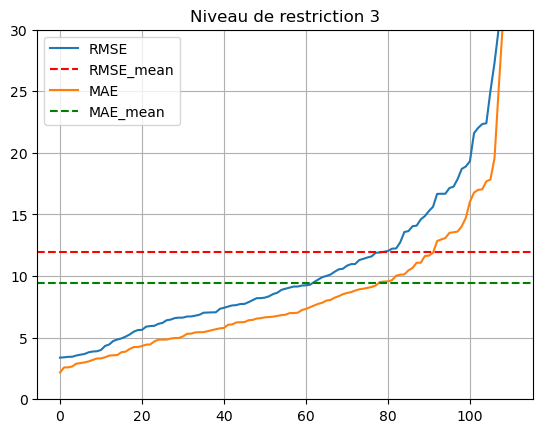

In [65]:
import statistics

plt.plot(sorted(list((mean_squared_error_list.values()))), label = "RMSE")
plt.axhline(y=statistics.mean(list((mean_squared_error_list.values()))), color='r', linestyle='--', label='RMSE_mean')
plt.plot(sorted(list((mean_abs_error_list.values()))), label = "MAE")
plt.axhline(y=statistics.mean(list((mean_abs_error_list.values()))), color='g', linestyle='--', label='MAE_mean')
plt.ylim(0, 30)
plt.grid()
plt.legend()
plt.title("Niveau de restriction 3")